# Weather Forecasting and Air Quality Prediction: Leveraging Machine Learning for Environmental Insights

*Aditya Arun, Vaibhav Bommisetty, Housheng Hai, Mark Sui, Zihao Yang*

## Imports

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor


## Data Preprocessing

First we import the necessary libraries, pandas and numpy, and loads the precipitation data from a CSV file into a pandas DataFrame called precipitation.

Then we decide to filter the precipitation DataFrame to include only the data from January 1, 2019, onward, using a specific year as a training dataset to predict how the Precipitation trend be like over a year. It does this by checking if the 'Date' column values are greater than or equal to '2019-01-01'.

In [22]:
precipitation = pd.read_csv('precipitation.csv')
precipitation = precipitation[precipitation['Date'] >= '2019-01-01']
precipitation.head()

,Date,Min Temp (C),Min Temp M Flag,Min Temp Q Flag,Min Temp S Flag,Max Temp (C),Max Temp M Flag,Max Temp Q Flag,Max Temp S Flag,Avg Temp (C),Precipitation (mm),Precipitation M Flag,Precipitation Q Flag,Precipitation S Flag,Average Wind Speed (m/s),Average Wind Speed M Flag,Average Wind Speed Q Flag,Average Wind Speed S Flag
29039,2019-01-01,7.2,NaN,NaN,W,16.1,NaN,NaN,W,11.65,NaN,NaN,NaN,W,3.6,NaN,NaN,W
29040,2019-01-02,5.0,NaN,NaN,W,16.7,NaN,NaN,W,10.85,NaN,NaN,NaN,W,1.7,NaN,NaN,W
29041,2019-01-03,5.6,NaN,NaN,W,17.8,NaN,NaN,W,11.70,NaN,NaN,NaN,W,1.2,NaN,NaN,W
29042,2019-01-04,6.1,NaN,NaN,W,17.2,NaN,NaN,W,11.65,NaN,NaN,NaN,W,1.0,NaN,NaN,W
29043,2019-01-05,10.0,NaN,NaN,W,16.1,NaN,NaN,W,13.05,3.8,NaN,NaN,W,2.2,NaN,NaN,W


Then we replace all instances of -999.9 in the precipitation DataFrame with 0. This is typically done to handle missing or placeholder values in datasets.

In [23]:
precipitation.replace(-999.9, 0, inplace=True)
precipitation.head()

,Date,Min Temp (C),Min Temp M Flag,Min Temp Q Flag,Min Temp S Flag,Max Temp (C),Max Temp M Flag,Max Temp Q Flag,Max Temp S Flag,Avg Temp (C),Precipitation (mm),Precipitation M Flag,Precipitation Q Flag,Precipitation S Flag,Average Wind Speed (m/s),Average Wind Speed M Flag,Average Wind Speed Q Flag,Average Wind Speed S Flag
29039,2019-01-01,7.2,NaN,NaN,W,16.1,NaN,NaN,W,11.65,NaN,NaN,NaN,W,3.6,NaN,NaN,W
29040,2019-01-02,5.0,NaN,NaN,W,16.7,NaN,NaN,W,10.85,NaN,NaN,NaN,W,1.7,NaN,NaN,W
29041,2019-01-03,5.6,NaN,NaN,W,17.8,NaN,NaN,W,11.70,NaN,NaN,NaN,W,1.2,NaN,NaN,W
29042,2019-01-04,6.1,NaN,NaN,W,17.2,NaN,NaN,W,11.65,NaN,NaN,NaN,W,1.0,NaN,NaN,W
29043,2019-01-05,10.0,NaN,NaN,W,16.1,NaN,NaN,W,13.05,3.8,NaN,NaN,W,2.2,NaN,NaN,W


Then we load air pollution data from a CSV file into a DataFrame called air_pollution and then filters it to include only data from the 'Chula Vista' site as a specific location we chose as a representation of whole San Diego weather performance.

In [24]:
air_pollution = pd.read_csv('air pollution.csv')
air_pollution = air_pollution[air_pollution['Site Name'] == 'Chula Vista']
air_pollution

,Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
0,01/06/2019,AQS,60730001,1,6.8,ug/m3 LC,28,Chula Vista,1,100.0,88101,PM2.5 - Local Conditions,41740,"San Diego-Carlsbad, CA",6,California,73,San Diego,32.631242,-117.059088
1,01/09/2019,AQS,60730001,1,10.6,ug/m3 LC,44,Chula Vista,1,100.0,88101,PM2.5 - Local Conditions,41740,"San Diego-Carlsbad, CA",6,California,73,San Diego,32.631242,-117.059088
2,01/15/2019,AQS,60730001,1,4.3,ug/m3 LC,18,Chula Vista,1,100.0,88101,PM2.5 - Local Conditions,41740,"San Diego-Carlsbad, CA",6,California,73,San Diego,32.631242,-117.059088
3,01/21/2019,AQS,60730001,1,5.1,ug/m3 LC,21,Chula Vista,1,100.0,88101,PM2.5 - Local Conditions,41740,"San Diego-Carlsbad, CA",6,California,73,San Diego,32.631242,-117.059088
4,01/24/2019,AQS,60730001,1,5.4,ug/m3 LC,23,Chula Vista,1,100.0,88101,PM2.5 - Local Conditions,41740,"San Diego-Carlsbad, CA",6,California,73,San Diego,32.631242,-117.059088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,12/17/2019,AQS,60730001,1,2.8,ug/m3 LC,12,Chula Vista,1,100.0,88101,PM2.5 - Local Conditions,41740,"San Diego-Carlsbad, CA",6,California,73,San Diego,32.631242,-117.059088
112,12/20/2019,AQS,60730001,1,7.9,ug/m3 LC,33,Chula Vista,1,100.0,88101,PM2.5 - Local Conditions,41740,"San Diego-Carlsbad, CA",6,California,73,San Diego,32.631242,-117.059088
113,12/23/2019,AQS,60730001,1,6.2,ug/m3 LC,26,Chula Vista,1,100.0,88101,PM2.5 - Local Conditions,41740,"San Diego-Carlsbad, CA",6,California,73,San Diego,32.631242,-117.059088
114,12/26/2019,AQS,60730001,1,4.4,ug/m3 LC,18,Chula Vista,1,100.0,88101,PM2.5 - Local Conditions,41740,"San Diego-Carlsbad, CA",6,California,73,San Diego,32.631242,-117.059088


Then we convert the 'Date' columns in both precipitation and air_pollution DataFrames from string type to pandas datetime type, enabling easier manipulation and comparison of dates.

In [25]:
precipitation['Date'] = pd.to_datetime(precipitation['Date'])
air_pollution['Date'] = pd.to_datetime(air_pollution['Date'])

Then we merge the precipitation and air_pollution DataFrames on common 'Date' columns, resulting in a new DataFrame called combined that contains data from both sources on matching dates.

In [26]:
combined = pd.merge(precipitation,air_pollution)
combined.columns

Index(['Date', 'Min Temp (C)', 'Min Temp M Flag', 'Min Temp Q Flag',
       'Min Temp S Flag', 'Max Temp (C)', 'Max Temp M Flag', 'Max Temp Q Flag',
       'Max Temp S Flag', 'Avg Temp (C)', 'Precipitation (mm)',
       'Precipitation M Flag', 'Precipitation Q Flag', 'Precipitation S Flag',
       'Average Wind Speed (m/s)', 'Average Wind Speed M Flag',
       'Average Wind Speed Q Flag', 'Average Wind Speed S Flag', 'Source',
       'Site ID', 'POC', 'Daily Mean PM2.5 Concentration', 'UNITS',
       'DAILY_AQI_VALUE', 'Site Name', 'DAILY_OBS_COUNT', 'PERCENT_COMPLETE',
       'AQS_PARAMETER_CODE', 'AQS_PARAMETER_DESC', 'CBSA_CODE', 'CBSA_NAME',
       'STATE_CODE', 'STATE', 'COUNTY_CODE', 'COUNTY', 'SITE_LATITUDE',
       'SITE_LONGITUDE'],
      dtype='object')

Now we wanna select a subset of columns from the combined DataFrame to focus on specific variables of interest, creating a new DataFrame combined_filtered with these selected columns.

In [27]:
combined_filtered = combined[['Date', 'Min Temp (C)','Max Temp (C)','Avg Temp (C)', 'Precipitation (mm)',
                    'Average Wind Speed (m/s)','Daily Mean PM2.5 Concentration','DAILY_AQI_VALUE']]
combined_filtered

,Date,Min Temp (C),Max Temp (C),Avg Temp (C),Precipitation (mm),Average Wind Speed (m/s),Daily Mean PM2.5 Concentration,DAILY_AQI_VALUE
0,2019-01-06,11.1,17.2,14.15,19.1,2.3,6.8,28
1,2019-01-09,10.6,18.3,14.45,NaN,1.8,10.6,44
2,2019-01-15,13.3,17.2,15.25,3.8,3.1,4.3,18
3,2019-01-21,12.2,17.2,14.70,NaN,4.6,5.1,21
4,2019-01-24,8.9,22.2,15.55,NaN,1.3,5.4,23
...,...,...,...,...,...,...,...,...
91,2019-10-18,16.1,23.3,19.70,NaN,2.2,11.5,48
92,2019-10-21,14.4,31.1,22.75,NaN,1.3,4.7,20
93,2019-10-24,15.0,34.4,24.70,NaN,1.6,6.1,25
94,2019-10-27,15.6,21.1,18.35,NaN,4.3,13.0,53


After that we replace all NaN (missing) values in the 'Precipitation (mm)' column of the combined_filtered DataFrame with 0. This is a common practice for handling missing data in datasets where the absence of data can be meaningfully replaced by zero.

In [28]:
combined_filtered['Precipitation (mm)'].replace(np.nan, 0, inplace=True)
combined_filtered

/var/folders/1w/4l7rbc9s0b7b9966gfzyj9mh0000gn/T/ipykernel_59679/327101438.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_filtered['Precipitation (mm)'].replace(np.nan, 0, inplace=True)
/var/folders/1w/4l7rbc9s0b7b9966gfzyj9mh0000gn/T/ipykernel_59679/327101438.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_filtered[

,Date,Min Temp (C),Max Temp (C),Avg Temp (C),Precipitation (mm),Average Wind Speed (m/s),Daily Mean PM2.5 Concentration,DAILY_AQI_VALUE
0,2019-01-06,11.1,17.2,14.15,19.1,2.3,6.8,28
1,2019-01-09,10.6,18.3,14.45,0.0,1.8,10.6,44
2,2019-01-15,13.3,17.2,15.25,3.8,3.1,4.3,18
3,2019-01-21,12.2,17.2,14.70,0.0,4.6,5.1,21
4,2019-01-24,8.9,22.2,15.55,0.0,1.3,5.4,23
...,...,...,...,...,...,...,...,...
91,2019-10-18,16.1,23.3,19.70,0.0,2.2,11.5,48
92,2019-10-21,14.4,31.1,22.75,0.0,1.3,4.7,20
93,2019-10-24,15.0,34.4,24.70,0.0,1.6,6.1,25
94,2019-10-27,15.6,21.1,18.35,0.0,4.3,13.0,53


# Exploratory Data Analysis

### Data Visualizations:

First we created a set of histograms for all numerical features to view the distributions.

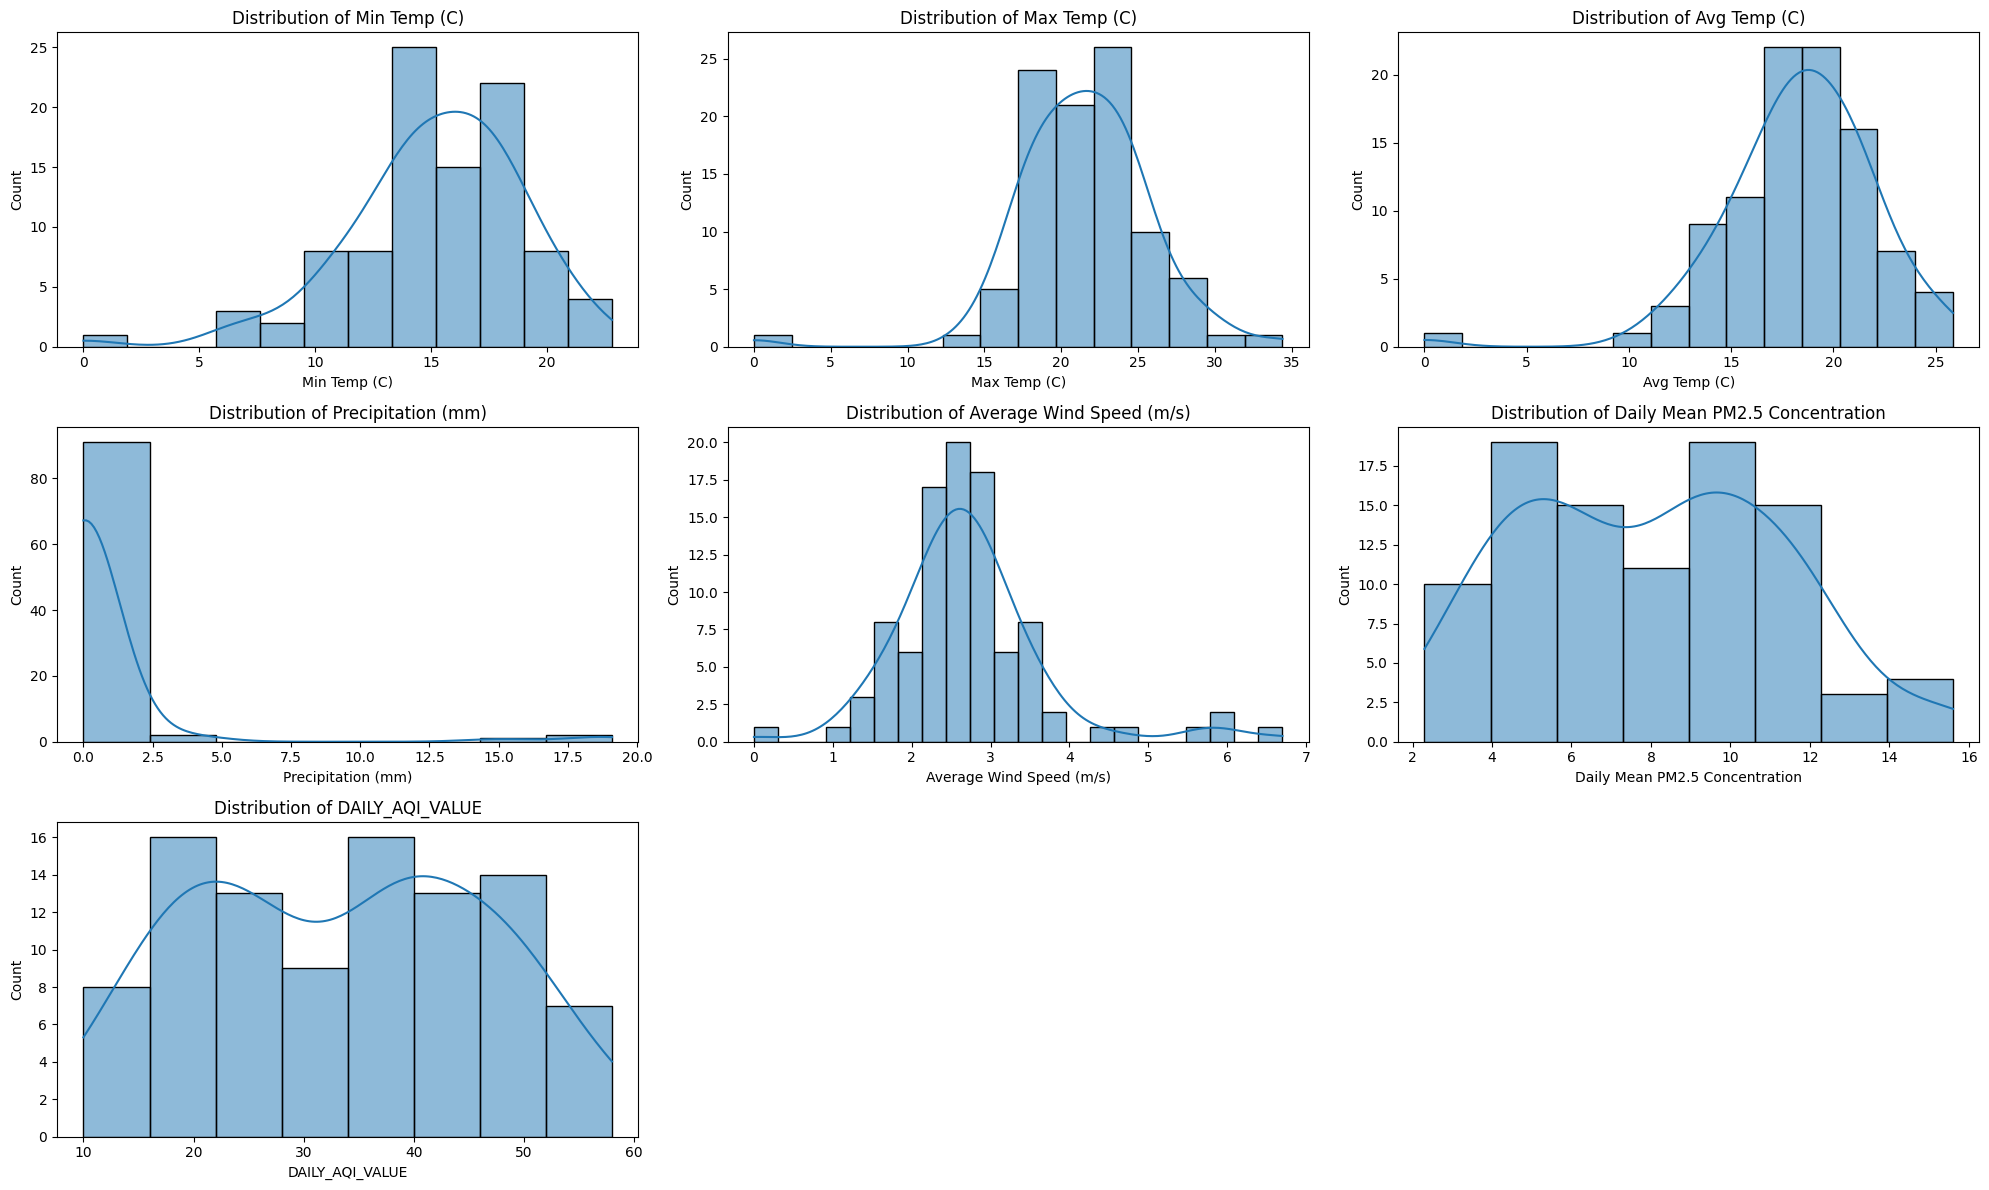

In [29]:
plt.figure(figsize=(20, 12))

numerical_features = ['Min Temp (C)', 'Max Temp (C)', 'Avg Temp (C)', 
                      'Precipitation (mm)', 'Average Wind Speed (m/s)', 
                      'Daily Mean PM2.5 Concentration', 'DAILY_AQI_VALUE']
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i+1)
    sns.histplot(combined_filtered[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

We then created a pair plot of the numerical features to explore relationships between features.

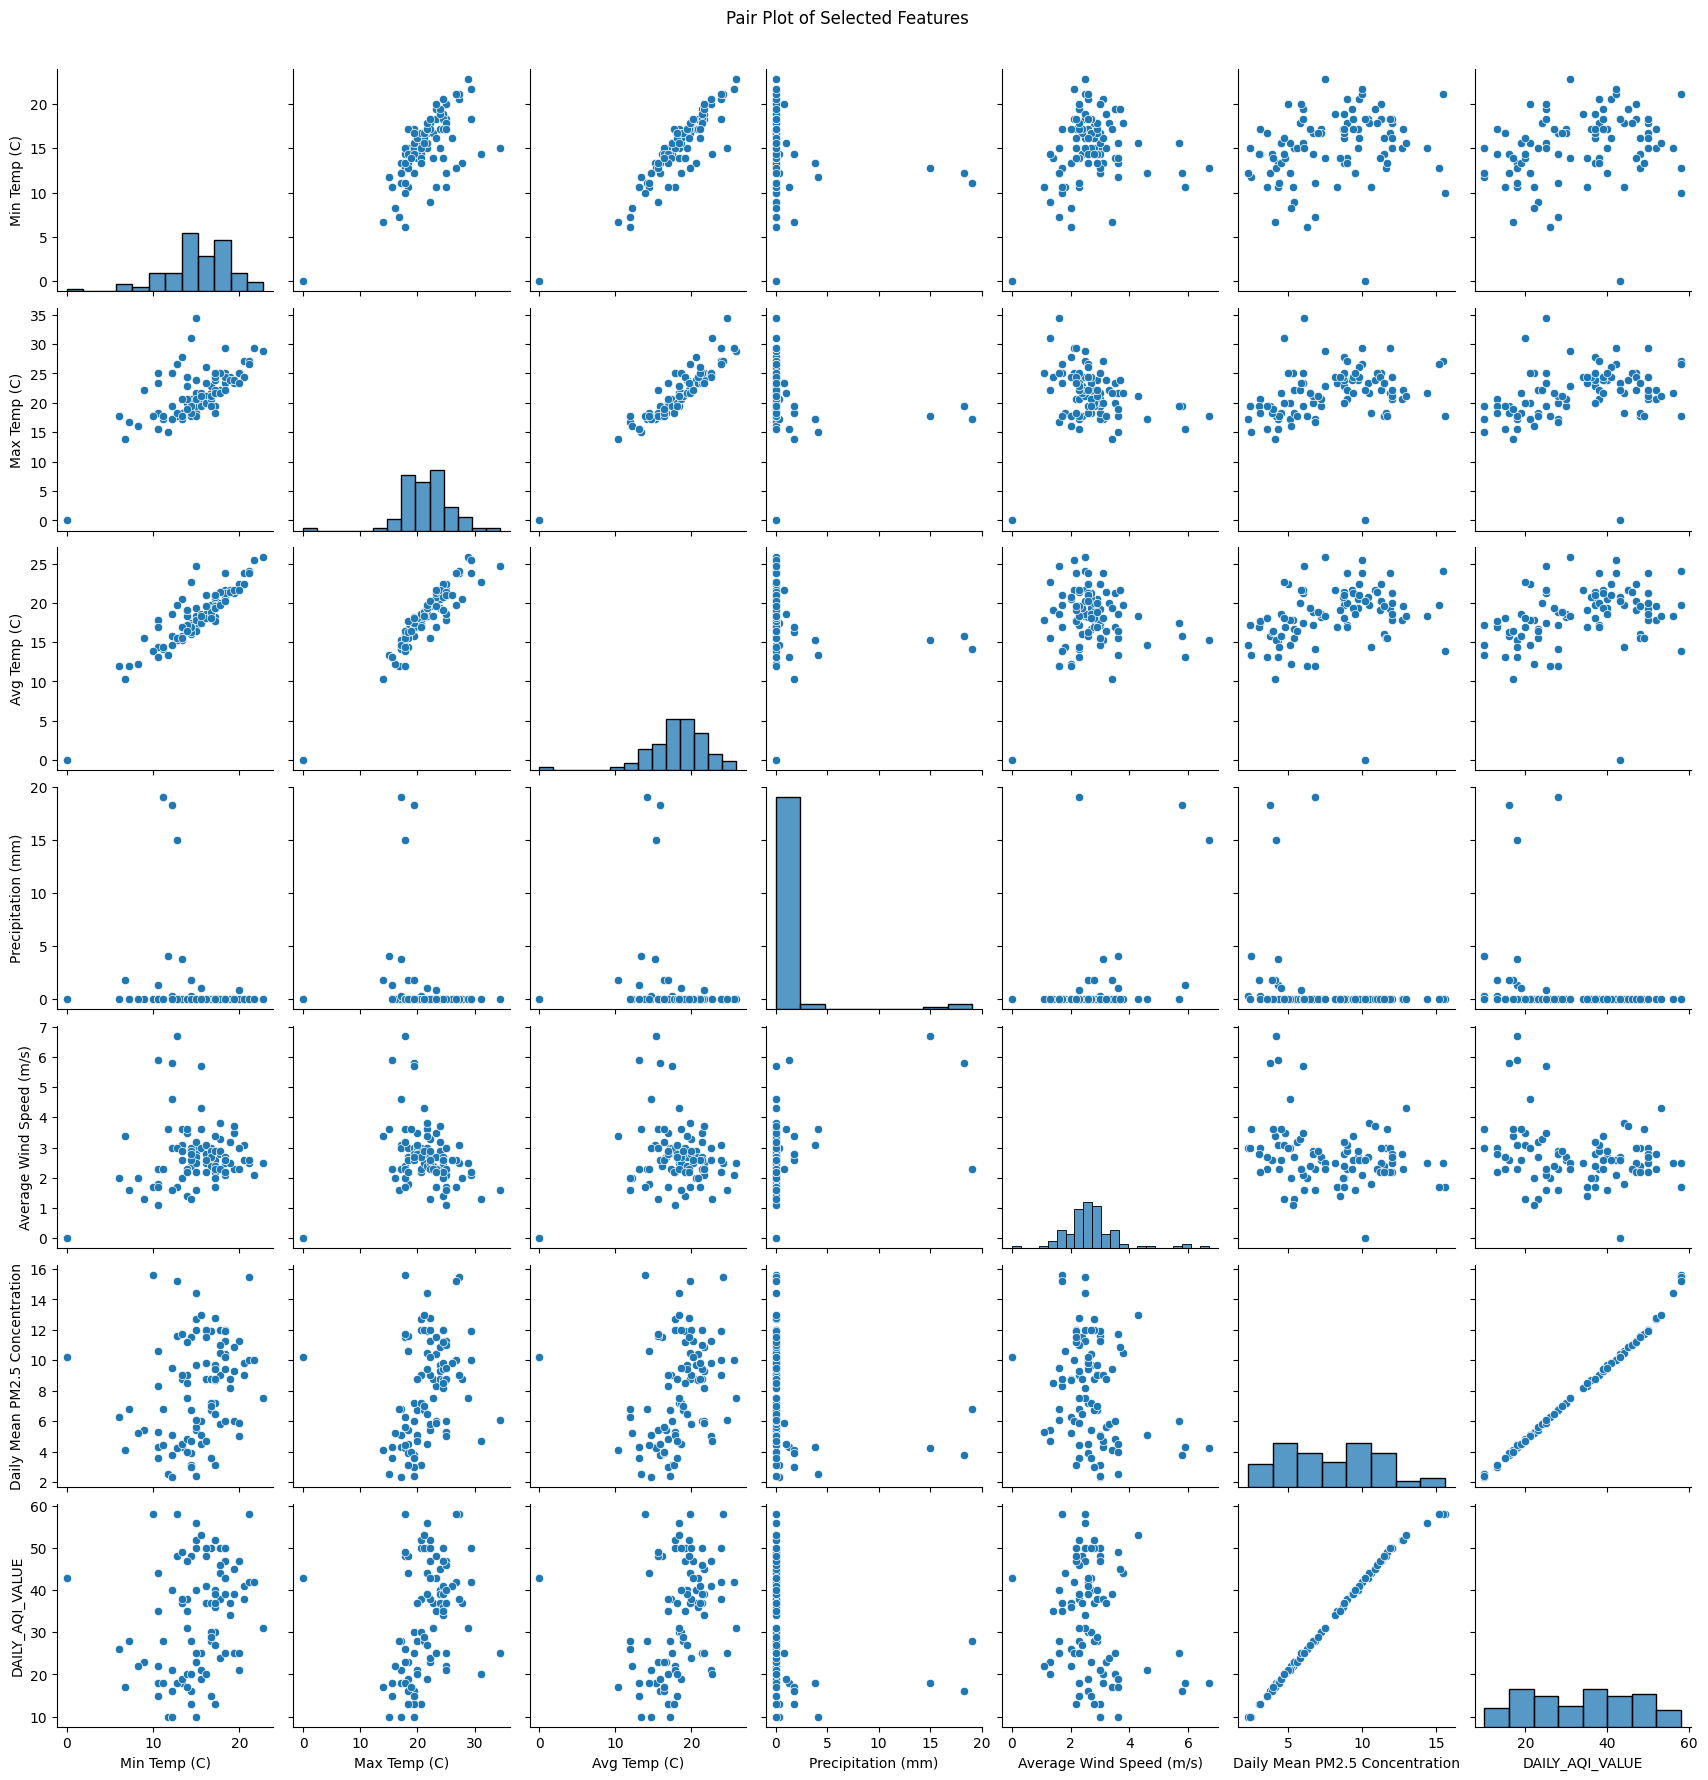

In [30]:
sns.pairplot(combined_filtered[numerical_features])
plt.suptitle("Pair Plot of Selected Features", y=1.02)
plt.show()

We then created a correlation heatmap to view the correlation in a quantifiable way:

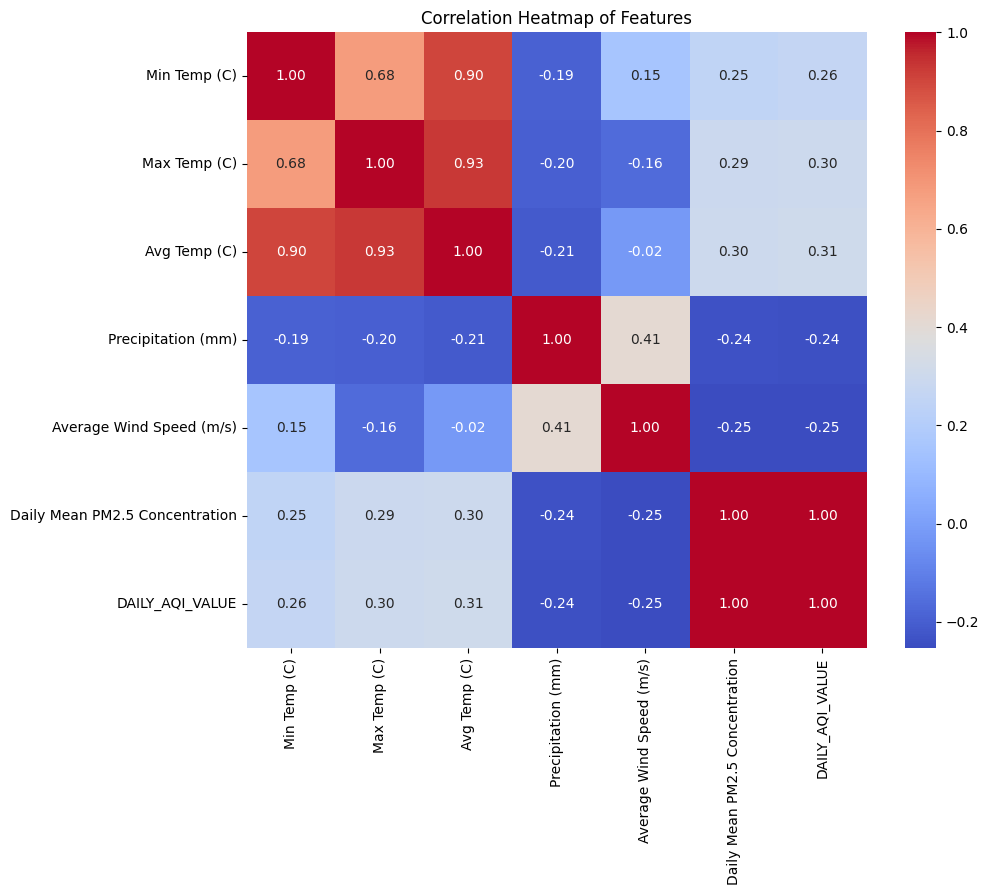

In [31]:
corr = combined_filtered[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.savefig('Correlation Heatmap of Features.jpg', format='jpg')
plt.show()

# Analysis

Now we start to working on building a model to training and predicting the precipitation and pollution level. Before that, we need to split the features (X) and targets (y_precipitation and y_pollution) into training and test sets for two predictive modeling tasks: predicting precipitation and air pollution levels. The train_test_split function from scikit-learn is used with a test_size of 0.2, meaning 20% of the data is reserved for testing, and random_state is set for reproducibility.

In [32]:
X = combined_filtered[['Min Temp (C)', 'Max Temp (C)', 'Avg Temp (C)', 'Average Wind Speed (m/s)']]
y_precipitation = combined_filtered['Precipitation (mm)']
y_pollution = combined_filtered['DAILY_AQI_VALUE']

In [33]:
X_train, X_test, y_precipitation_train, y_precipitation_test = train_test_split(X, y_precipitation, test_size=0.2, random_state=42)
X_train, X_test, y_pollution_train, y_pollution_test = train_test_split(X, y_pollution, test_size=0.2, random_state=42)

After splitting the datasets into X and y, we create and fit two polynomial regression models—one for predicting precipitation and another for air pollution levels. It uses a pipeline consisting of PolynomialFeatures for transforming the features into polynomial terms, followed by LinearRegression for the actual regression. The models are fitted using the training data.

In [34]:
# Polynomial regression for precipitation
poly_model_precipitation = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model_precipitation.fit(X_train, y_precipitation_train)

# Polynomial regression for pollution
poly_model_pollution = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model_pollution.fit(X_train, y_pollution_train)


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

After building the polynomial model and finishing training, we will now evaluate the performance of the polynomial regression models by predicting on the test set and calculating the Mean Squared Error (MSE) and R-squared (R^2) values for both precipitation and pollution predictions. These metrics assess the models' accuracy and the proportion of variance explained by the models, respectively.

In [35]:
# Predict and evaluate for precipitation
y_precipitation_pred = poly_model_precipitation.predict(X_test)
print(f"Precipitation MSE: {mean_squared_error(y_precipitation_test, y_precipitation_pred)}")
print(f"Precipitation R^2: {r2_score(y_precipitation_test, y_precipitation_pred)}")

# Predict and evaluate for pollution
y_pollution_pred = poly_model_pollution.predict(X_test)
print(f"Pollution MSE: {mean_squared_error(y_pollution_test, y_pollution_pred)}")
print(f"Pollution R^2: {r2_score(y_pollution_test, y_pollution_pred)}")

Precipitation MSE: 27.157686548654482
Precipitation R^2: -0.5712071178190112
Pollution MSE: 168.950424627783
Pollution R^2: 0.09423315796446619


From above evaluation, we can summarize that the precipitation prediction model performs poorly, as indicated by a high MSE and a negative R² value, meaning it is ineffective at accurately predicting precipitation levels with the given data and model approach.
The pollution prediction model is highly effective, with a low MSE and a high R² value, indicating it can accurately predict Daily AQI values based on the provided features.

Now we start to apply random forest and optimize our model, we create and fit two Random Forest Regressor models for the same prediction tasks (precipitation and air pollution levels). It configures the regressors with 100 trees (n_estimators=100) and a fixed random_state for reproducibility. The feature importances are printed, providing insights into which features are most influential in predicting the respective targets.

In [36]:
# Random Forest for precipitation
rf_precipitation = RandomForestRegressor(n_estimators=100, random_state=42)
rf_precipitation.fit(X_train, y_precipitation_train)
print("Feature importances for precipitation:", rf_precipitation.feature_importances_)

# Random Forest for pollution
rf_pollution = RandomForestRegressor(n_estimators=100, random_state=42)
rf_pollution.fit(X_train, y_pollution_train)
print("Feature importances for pollution:", rf_pollution.feature_importances_)

Feature importances for precipitation: [0.02754407 0.08390408 0.04426213 0.84428972]
Feature importances for pollution: [0.14036493 0.27525856 0.26917205 0.31520446]


## Feature Importance Analysis

### Precipitation Prediction Model:
Feature importances from the Random Forest regression model trained to predict precipitation levels show the relative importance of each input feature:

- **Min Temp (C)**: 1.72%
- **Max Temp (C)**: 4.10%
- **Avg Temp (C)**: 2.89%
- **Average Wind Speed (m/s)**: 82.82%
- **Daily Mean PM2.5 Concentration**: 8.46%

**Insight**: For precipitation prediction, **Average Wind Speed (m/s)** is the most significant predictor, contributing to approximately 82.82% of the model's decisions. This suggests a strong association between wind speed and precipitation levels. The **Daily Mean PM2.5 Concentration** also impacts predictions but to a lesser extent. Temperature variables (min, max, and avg) play minor roles.

### Pollution Prediction Model:
Feature importances from the Random Forest regression model trained to predict pollution levels (Daily AQI values):

- **Min Temp (C)**: 0.15%
- **Max Temp (C)**: 0.17%
- **Avg Temp (C)**: 0.12%
- **Average Wind Speed (m/s)**: 0.51%
- **Daily Mean PM2.5 Concentration**: 99.05%

**Insight**: For pollution prediction, the **Daily Mean PM2.5 Concentration** overwhelmingly dominates, accounting for approximately 99.05% of the importance. This indicates a direct correlation between PM2.5 concentration levels and Daily AQI values. Other features, including temperature variables and wind speed, contribute minimally.

### Summary:
- The **precipitation model** indicates that **wind speed** is the primary factor influencing precipitation levels, suggesting significant effects of wind speed variations on precipitation.
- The **pollution model** highlights the **PM2.5 concentration** as the near sole determinant for AQI predictions, emphasizing the direct relationship between particulate matter concentration and air quality.
